# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [15]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [16]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [17]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [18]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
キーエンス
中外薬
ＮＴＴ
任天堂
三井住友ＦＧ
リクルート
ＫＤＤＩ
伊藤忠
ＳＢ
東京海上
ＳＢＧ
三菱商
東エレク
三菱重
みずほＦＧ
ＪＴ
三井物
信越化
ホンダ
武田
第一三共
富士通
キヤノン
ＯＬＣ
三菱電
['7203', '6758', '8306', '6501', '9983', '6861', '4519', '9432', '7974', '8316', '6098', '9433', '8001', '9434', '8766', '9984', '8058', '8035', '7011', '8411', '2914', '8031', '4063', '7267', '4502', '4568', '6702', '7751', '4661', '6503']


In [19]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [20]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,6861,4519,9432,7974,8316,...,2914,8031,4063,7267,4502,4568,6702,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.983236,0.984000,0.969175,0.992379,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.999574,0.983333,0.975975,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.007387,0.992000,1.027199,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,0.973799,1.000426,0.994573,0.989588,0.982036,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.945819,0.965904,0.981683,0.923372,0.946856,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.936115,0.964342,0.980326,0.932049,0.934132,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935145,0.935502,0.968114,0.951685,0.918413,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.898916,0.941611,0.966757,0.920632,0.847804,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.884522,0.945305,0.977612,0.911225,0.779691,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.869797


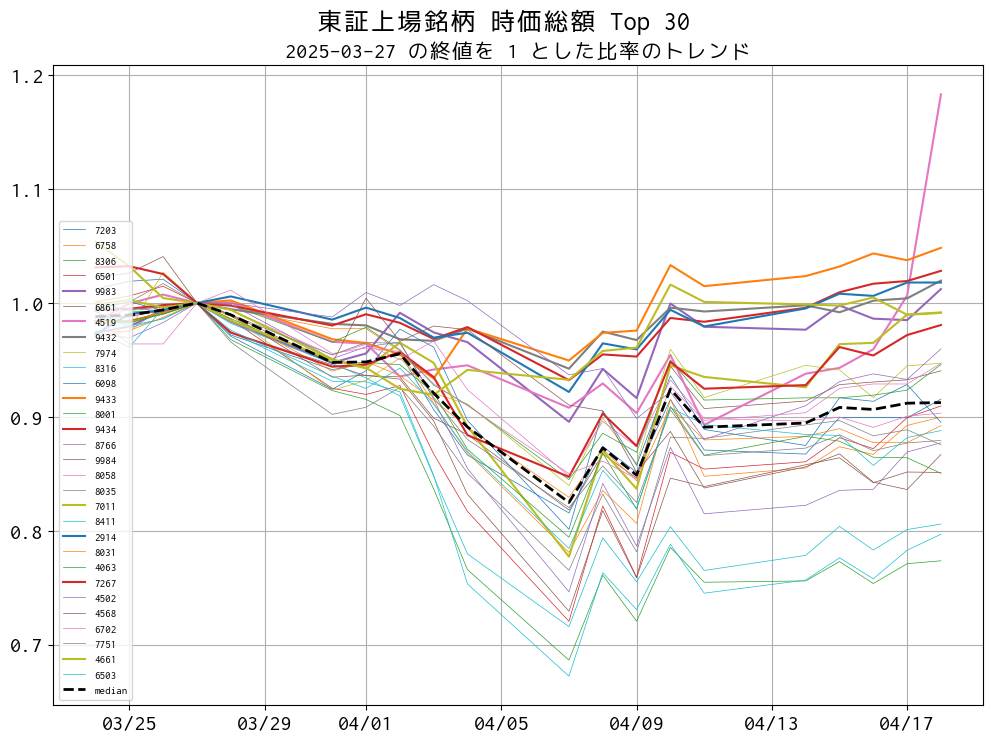

In [21]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    match colname:
        case '4519':
            width = 1.5
            lstyle = 'solid'
        case '7011':
            width = 1.5
            lstyle = 'solid'
        case '7267':
            width = 1.5
            lstyle = 'solid'
        case '9983':
            width = 1.5
            lstyle = 'solid'
        case '4661':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.5
            lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [22]:
for code in ['4519', '9433', '9434', '9432', '2914', '9983', '7011', '4661', '7267']:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-16    0.959369
2025-04-17    1.006535
2025-04-18    1.183123
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-16    1.043496
2025-04-17    1.037546
2025-04-18    1.048420
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-16    1.016933
2025-04-17    1.019285
2025-04-18    1.028222
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-16    1.002035
2025-04-17    1.004071
2025-04-18    1.019674
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-16    1.006228
2025-04-17    1.017964
2025-04-18    1.017964
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-16    0.986237
2025-04-17    0.984946
2025-04-18    1.012258
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-04-16    0.964998
2025-04-17    0.989838
2025-04-18    0.991720
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-16    1.004839
2025-04-17    0.989677
2025-04-18    0.991

In [23]:
summary

,7203,6758,8306,6501,9983,6861,4519,9432,7974,8316,...,2914,8031,4063,7267,4502,4568,6702,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.983236,0.984000,0.969175,0.992379,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.999574,0.983333,0.975975,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.007387,0.992000,1.027199,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.967868,0.985554,0.983656,0.973799,1.000426,0.994573,0.989588,0.982036,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.923112,0.925094,0.947527,0.945819,0.965904,0.981683,0.923372,0.946856,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.915309,0.919743,0.955699,0.936115,0.964342,0.980326,0.932049,0.934132,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.901308,0.927501,0.991398,0.935145,0.935502,0.968114,0.951685,0.918413,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.836814,0.867576,0.974194,0.898916,0.941611,0.966757,0.920632,0.847804,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.765894,0.817014,0.965591,0.884522,0.945305,0.977612,0.911225,0.779691,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.869797


In [24]:
summary.tail(1).iloc[0]

7203    0.915602
6758    0.899792
8306    0.773697
6501    0.909577
9983    1.012258
6861    0.940482
4519    1.183123
9432    1.019674
7974    0.947118
8316    0.805888
6098    0.895220
9433    1.048420
8001    0.945991
9434    1.028222
8766    0.877301
9984    0.851250
8058    0.903343
8035    0.875505
7011    0.991720
8411    0.797011
2914    1.017964
8031    0.892377
4063    0.850492
7267    0.980661
4502    0.959714
4568    0.867008
6702    0.947053
7751    0.879392
4661    0.991290
6503    0.888029
Name: 2025-04-18 00:00:00, dtype: float64

In [25]:
summary.median(axis=1)

2025-03-24    0.988073
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989657
2025-03-31    0.947801
2025-04-01    0.948237
2025-04-02    0.955387
2025-04-03    0.920925
2025-04-04    0.891153
2025-04-07    0.824919
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
2025-04-11    0.890984
2025-04-14    0.894629
2025-04-15    0.908320
2025-04-16    0.906548
2025-04-17    0.912041
2025-04-18    0.912590
dtype: float64